# Data Loading

In [3]:
import pandas as pd

# Load dataset
data = pd.read_csv('car/car data.csv')

# Display the first few rows of the dataset
print("Step 1: Data Loading")
print(data.head())


Step 1: Data Loading
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


# Data Preprocessing

In [4]:
# Handle missing values and encode categorical data
data.dropna(inplace=True)
data = pd.get_dummies(data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Display the processed data
print("\nStep 2: Data Preprocessing")
print(data.head())




Step 2: Data Preprocessing
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Owner  \
0     ritz  2014           3.35           5.59       27000      0   
1      sx4  2013           4.75           9.54       43000      0   
2     ciaz  2017           7.25           9.85        6900      0   
3  wagon r  2011           2.85           4.15        5200      0   
4    swift  2014           4.60           6.87       42450      0   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Individual  \
0             False              True                    False   
1              True             False                    False   
2             False              True                    False   
3             False              True                    False   
4              True             False                    False   

   Transmission_Manual  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True  


# Feature Selection

In [5]:
# Selecting features and target variable
X = data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = data['Selling_Price']

# Display the selected features and target variable
print("\nStep 3: Feature Selection")
print("Features:")
print(X.head())
print("Target Variable:")
print(y.head())



Step 3: Feature Selection
Features:
   Year  Present_Price  Driven_kms  Owner  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014           5.59       27000      0             False              True   
1  2013           9.54       43000      0              True             False   
2  2017           9.85        6900      0             False              True   
3  2011           4.15        5200      0             False              True   
4  2014           6.87       42450      0              True             False   

   Selling_type_Individual  Transmission_Manual  
0                    False                 True  
1                    False                 True  
2                    False                 True  
3                    False                 True  
4                    False                 True  
Target Variable:
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


# Model Selection and Training

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Model Selection
model = LinearRegression()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the model
model.fit(X_train, y_train)

# Displaying the shape of the train and test sets
print("\nStep 4: Model Selection and Training")
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)



Step 4: Model Selection and Training
Training set size: (240, 8)
Test set size: (61, 8)


# Model Evaluation

In [7]:
from sklearn.metrics import mean_squared_error

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)

# Printing the evaluation result
print("\nStep 5: Model Evaluation")
print("Mean Squared Error:", mse)



Step 5: Model Evaluation
Mean Squared Error: 2.1637802438011


# Feature Engineering - Age of the Car

In [8]:
# Calculate the age of the car
data['Car_Age'] = 2024 - data['Year']  # Assuming the current year is 2024

# Print output
print("\nStep 1: Feature Engineering - Age of the Car")
print(data[['Year', 'Car_Age']].head())



Step 1: Feature Engineering - Age of the Car
   Year  Car_Age
0  2014       10
1  2013       11
2  2017        7
3  2011       13
4  2014       10


# Feature Engineering - Label Encoding for 'Car_Name'

In [12]:

from sklearn.preprocessing import LabelEncoder

# Applying label encoding to 'Car_Name'
label_encoder = LabelEncoder()
data['Car_Name_encoded'] = label_encoder.fit_transform(data['Car_Name'])

# Print output
print("\nStep 2: Feature Engineering - Label Encoding for 'Car_Name'")
print(data[['Car_Name', 'Car_Name_encoded']].head())



Step 2: Feature Engineering - Label Encoding for 'Car_Name'
  Car_Name  Car_Name_encoded
0     ritz                90
1      sx4                93
2     ciaz                68
3  wagon r                96
4    swift                92


# Feature Engineering - Log Transformation

In [14]:
import numpy as np

# Applying log transformation
data['Present_Price_log'] = np.log1p(data['Present_Price'])
data['Driven_kms_log'] = np.log1p(data['Driven_kms'])

# Print output
print("\nStep 3: Feature Engineering - Log Transformation")
print(data[['Present_Price', 'Present_Price_log', 'Driven_kms', 'Driven_kms_log']].head())



Step 3: Feature Engineering - Log Transformation
   Present_Price  Present_Price_log  Driven_kms  Driven_kms_log
0           5.59           1.885553       27000       10.203629
1           9.54           2.355178       43000       10.668979
2           9.85           2.384165        6900        8.839422
3           4.15           1.638997        5200        8.556606
4           6.87           2.063058       42450       10.656106


# Correlation Heatmap

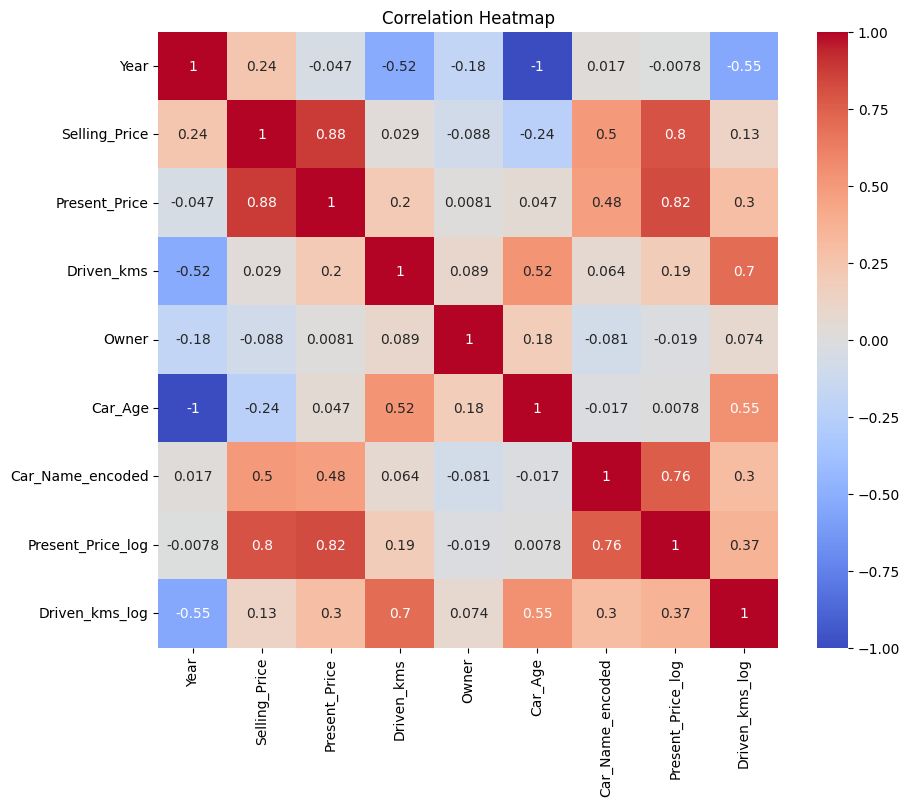

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'data' DataFrame contains only numeric columns
# For example, drop or encode non-numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Now, create the heatmap with the numeric-only DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Pairplot for Selected Features

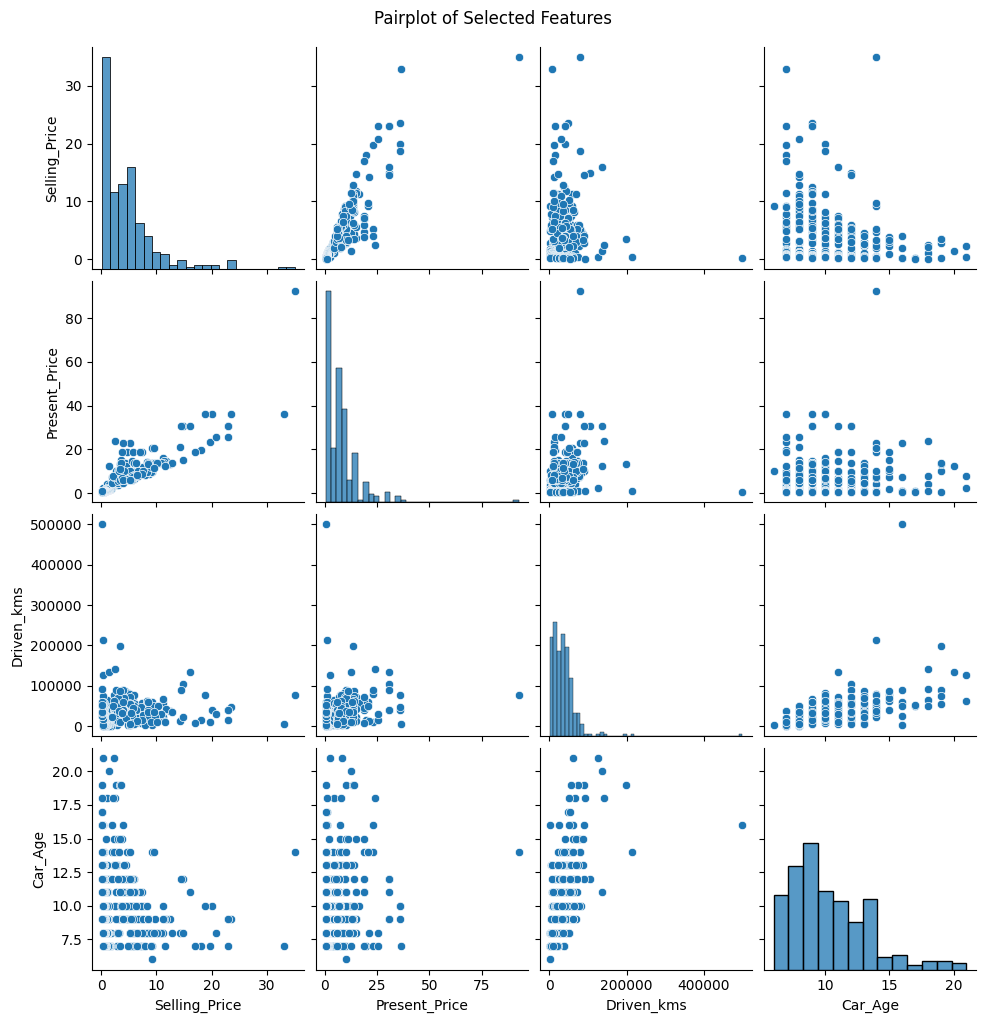

In [17]:
sns.pairplot(data[['Selling_Price', 'Present_Price', 'Driven_kms', 'Car_Age']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


# Selling Price vs Present Price

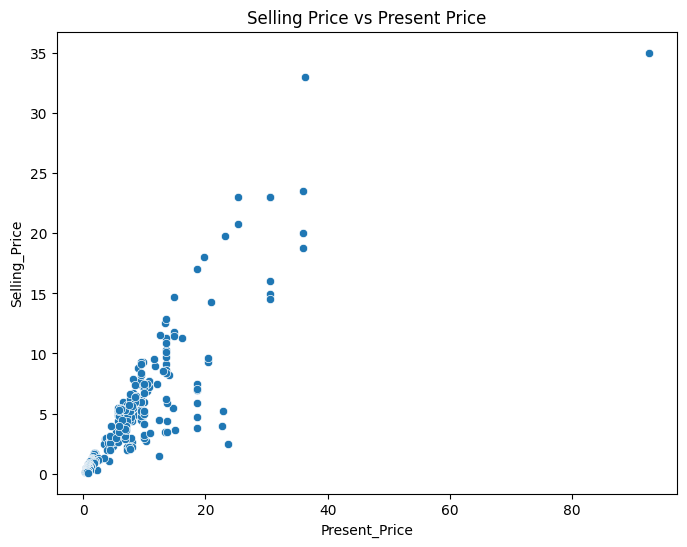

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data)
plt.title('Selling Price vs Present Price')
plt.show()


# Distribution of Car Age

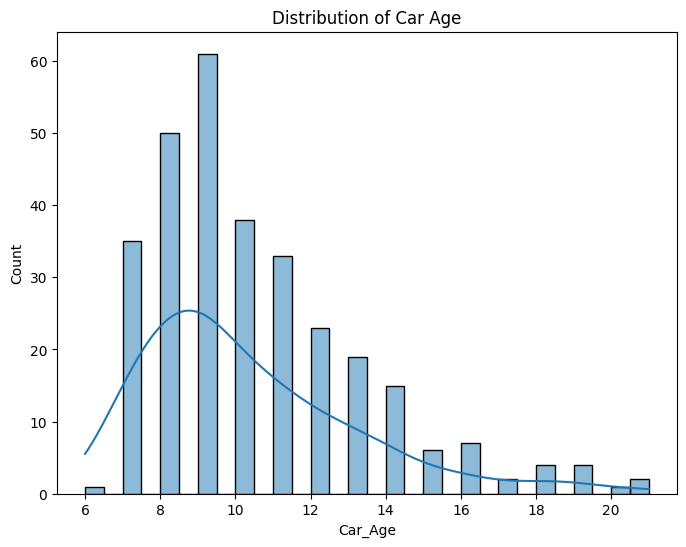

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Car_Age'], bins=30, kde=True)
plt.title('Distribution of Car Age')
plt.show()


# Outlier Detection and Removal

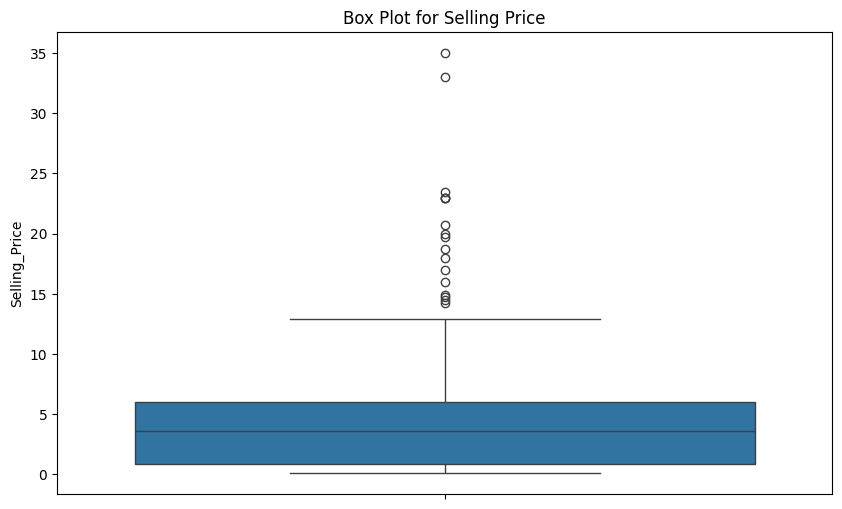


Step 1: Outlier Detection and Removal
Data shape after outlier removal: (295, 14)


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier detection using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data['Selling_Price'])
plt.title('Box Plot for Selling Price')
plt.show()

# Assuming an outlier threshold (adjust based on your data)
upper_limit = data['Selling_Price'].quantile(0.99)
data = data[data['Selling_Price'] < upper_limit]

# Print the effect of outlier removal
print("\nStep 1: Outlier Detection and Removal")
print(f"Data shape after outlier removal: {data.shape}")


# Feature Importance

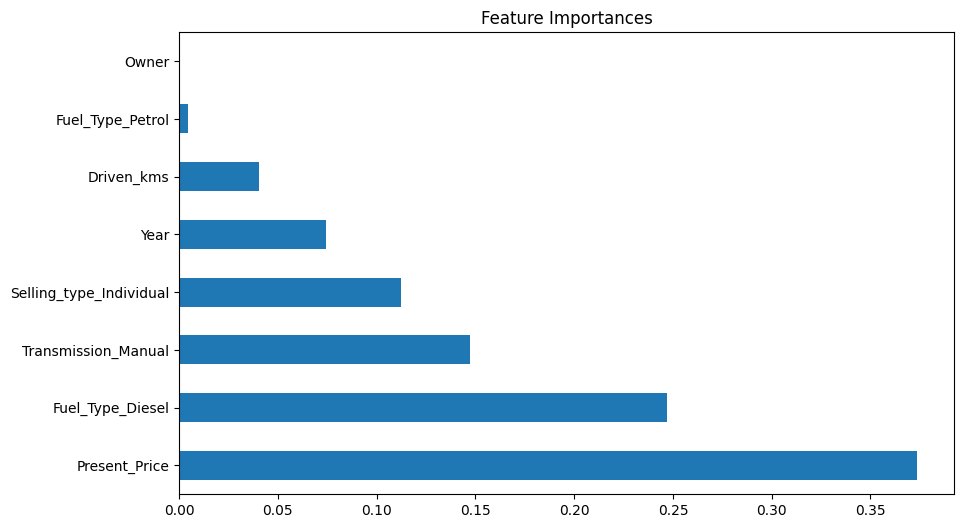


Step 2: Feature Importance
Year                       0.074585
Present_Price              0.373645
Driven_kms                 0.040617
Owner                      0.000454
Fuel_Type_Diesel           0.246803
Fuel_Type_Petrol           0.004740
Selling_type_Individual    0.112088
Transmission_Manual        0.147068
dtype: float64


In [22]:
from sklearn.ensemble import ExtraTreesRegressor

# Feature importance
model = ExtraTreesRegressor()
model.fit(X, y)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# Print output
print("\nStep 2: Feature Importance")
print(feat_importances)


# Advanced Model Evaluation

In [23]:
from sklearn.model_selection import cross_val_score

# Model evaluation using cross-validation
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
mean_score = scores.mean()

# Print output
print("\nStep 3: Advanced Model Evaluation")
print(f"Mean Score from Cross-Validation: {mean_score}")



Step 3: Advanced Model Evaluation
Mean Score from Cross-Validation: -3.41245761250601


# Hyperparameter Tuning Using GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Define the model
model = ExtraTreesRegressor()

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto' from this list
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Print output
print("\nCorrected Step 4: Hyperparameter Tuning Using GridSearchCV")
print(f"Best Parameters: {best_params}")



Corrected Step 4: Hyperparameter Tuning Using GridSearchCV
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}
